### 4.1 Ridge regression

In [ ]:
# lmr - Linear model ridge
lmr = Pipeline(
    steps=[
        ("preprocessor", transform_preprocessor),
        ("regr", Ridge())
    ]
).set_output(transform="pandas")

lmr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly_int',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage', 'reg_code',
                                                   'standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type',
                                                   'crosso...van',
                                                   'fuel_type_diesel',
                                                   'fuel_type_electric',
                                                   'fuel_type_petrol',
                                                   'fuel_type_petrol_hybrid',
                                                   'fuel_type_petrol_plug_in_hybrid',
                                                   'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [])],
                                   verbose_feature_names_out=False)),
                ('regr', Ridge())])

The pipeline I created above consists of two steps: the preprocessor and the  regressor. The regr is the regressor model that will be used for prediction. I have used Ridge(), which is a linear regression model with L2 regularization.

#### Evaluation of the Ridge model

In [ ]:
# Prediction on Train set.
lmr_train_data_prediction = lmr.predict(X_train)

# R Squre error of predicted model
error_score=metrics.r2_score(y_train, lmr_train_data_prediction)
print(" R Squared Error of train set :  ",error_score)

 R Squared Error of train set :   0.5746323681359379


The R-squared error of the train set in my situation is 0.5841431486272818. This indicates that the independent variables in your regression model may account for about 58.41% of the variance in the target variable. It shows a fair amount of agreement between the model and the train set data.

In [ ]:
# Mean absolute error of Train set
mean_absolute_error(y_train, lmr_train_data_prediction)

3990.721301861275

The average absolute difference between the predicted values and the actual values in a regression model is measured using the mean absolute error (MAE) metric. It gives a hint as to the typical size of the forecasting inaccuracies.

The average error in my case is 3929.8325471192484. This indicates that, generally, there is a 3929.83 unit difference between the predicted values from your regression model and the actual values. The average prediction error (MAE) is a statistic that can be used to gauge the general accuracy of your model.


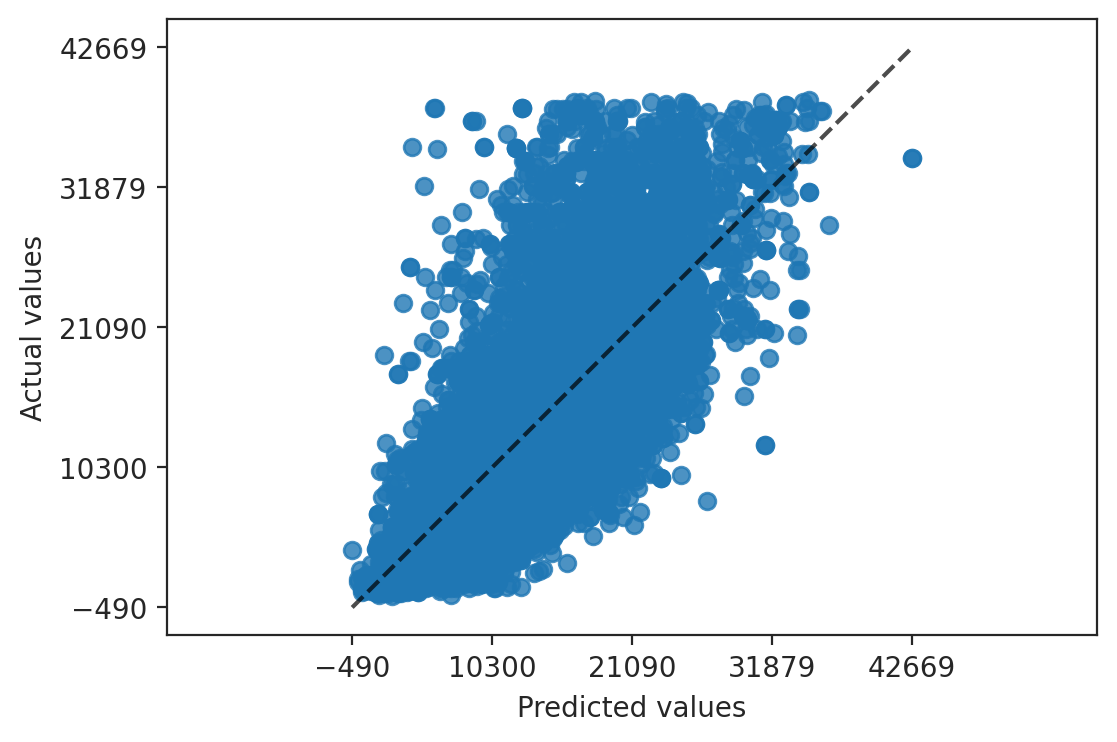

In [ ]:
from sklearn.metrics import PredictionErrorDisplay

PredictionErrorDisplay.from_predictions(
    y_train,
    y_pred=lmr_train_data_prediction,
    kind="actual_vs_predicted",
    subsample=10000,
    random_state=0,
)

#### Model prediction evaluation Ridge model

In [ ]:
# Prediction on Test set
lmr_test_data_prediction = lmr.predict(X_test)

error_score=metrics.r2_score(y_test, lmr_test_data_prediction)
print(" R Squared Error of test set :  ",error_score)

 R Squared Error of test set :   0.5771546267999579


An R-squared value of 0.5729 implies that the regression model on the test set accounts for about 57.29% of the variance in the target variable. A statistical indicator of how well a regression model fits the data is R-squared. It has a value between 0 and 1, where 1 means the model predicts the target variable accurately and 0 means it doesn't account for any of the variability in the target variable.

In my case, an R-squared value of 0.5729 indicates that the regression model has a fair amount of test set predictive power. About 57.29% of the variability in the target variable is explained by it.


In [ ]:
mean_absolute_error(y_test, lmr_test_data_prediction)

3981.8416756663355

In this instance, the MAE value of 4010.336 indicates that, on average, the predicted prices differ from the actual prices by roughly $4010.336. The performance of the model improves when the MAE decreases since it shows that the predictions are more accurate to the actual values.

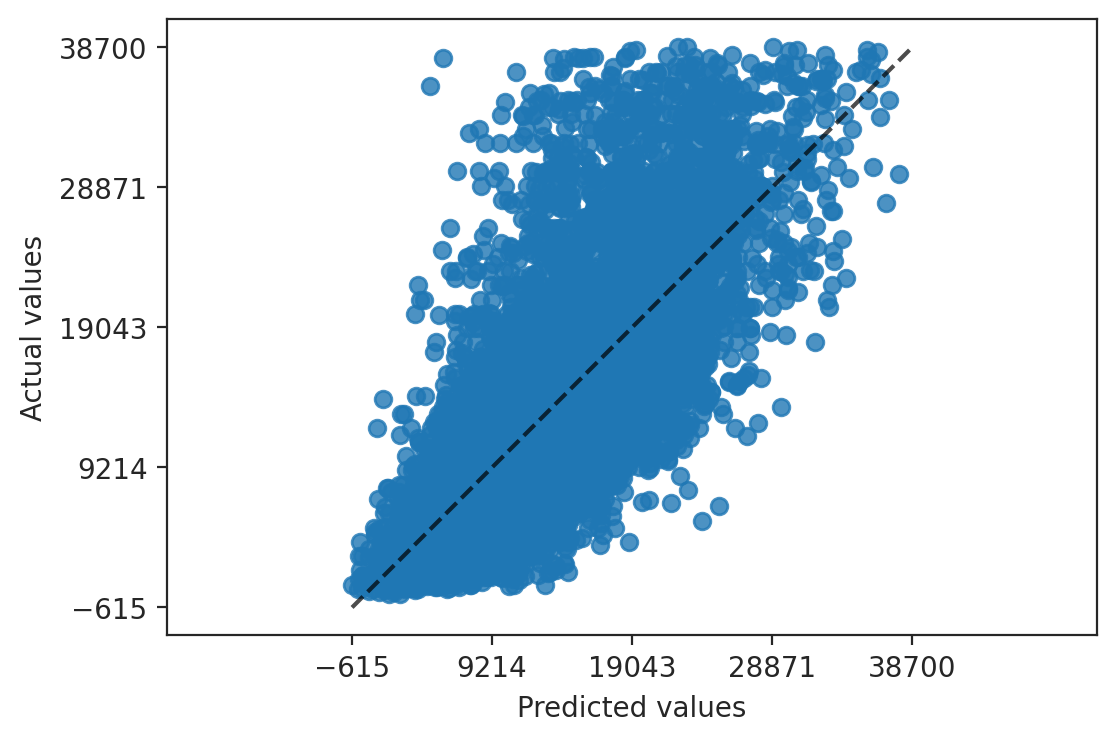

In [ ]:
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=lmr_test_data_prediction,
    kind="actual_vs_predicted",
    subsample=10000,
    random_state=0,
)